<a href="https://colab.research.google.com/github/zoro1324/Chronic-kidney-disease/blob/main/Chronic_kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [74]:
df = pd.read_csv('/content/kidney_disease.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [75]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [76]:
df.drop(columns=('id'),axis=1,inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [77]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [78]:
df.rename(
    {
        'bp' : 'Blood_Pressure',
        'sg' : 'Specific_Gravity',
        'al' : 'Albumin',
        'su' : 'Sugar',
        'rbc' : 'Red_Blood_Cells',
        'pc' : 'Pus_Cell',
        'pcc' : 'Pus_Cell_Clumps',
        'ba' : 'Bacteria',
        'bgr' : 'Blood_Glucose_Random',
        'bu' : 'Blood_Unicorn',
        'sc' : 'Specific_Chromatin',
        'sod' : 'Sodium',
        'pot' : 'Potasium',
        'hemo' : 'Hemoglobin',
        'pcv' : 'Packed_Cell_Volume',
        'wc' : 'White_Blood_Cell_Count',
        'rc' : 'Red_Blood_Cell_Count',
        'htn' : 'Hypertension',
        'dm' : 'Diabetes_Mellitus',
        'cad' : 'Coronary_Artery_Disease',
        'appet' : 'Appetite',
        'pe' : 'Pedal_Edema',
        'ane' : 'Ann_Artery_Disease',
    },
    axis=1,
    inplace=True
)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cells          248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blood_Unicorn            381 non-null    float64
 11  Specific_Chromatin       383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potasium                 312 non-null    float64
 14  Hemoglobin               3

In [80]:
df.head()

,age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Ann_Artery_Disease,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [81]:
df['Packed_Cell_Volume'] = pd.to_numeric(df['Packed_Cell_Volume'],errors='coerce')
df['White_Blood_Cell_Count'] = pd.to_numeric(df['White_Blood_Cell_Count'],errors='coerce')
df['Red_Blood_Cell_Count'] = pd.to_numeric(df['Red_Blood_Cell_Count'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cells          248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blood_Unicorn            381 non-null    float64
 11  Specific_Chromatin       383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potasium                 312 non-null    float64
 14  Hemoglobin               3

In [82]:
missing = df.isnull().sum()
missing[missing>0].sort_values(ascending=False)

,0
Red_Blood_Cells,152
Red_Blood_Cell_Count,131
White_Blood_Cell_Count,106
Potasium,88
Sodium,87
Packed_Cell_Volume,71
Pus_Cell,65
Hemoglobin,52
Sugar,49
Specific_Gravity,47


In [83]:
print(df['classification'].unique())
print(df['Diabetes_Mellitus'].unique())
print(df['Appetite'].unique())

['ckd' 'ckd\t' 'notckd']
['yes' 'no' ' yes' '\tno' '\tyes' nan]
['good' 'poor' nan]


In [84]:
df['classification'] = df['classification'].replace(to_replace={'ckd\t':'ckd'})
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].replace(to_replace={' yes':'yes','\tyes':'yes','\tno':'no'})


In [85]:
print(df['classification'].unique())
print(df['Diabetes_Mellitus'].unique())
print(df['Appetite'].unique())

['ckd' 'notckd']
['yes' 'no' nan]
['good' 'poor' nan]


In [86]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        # For numeric columns
        for group in df['classification'].unique():
            mean_val = df.loc[df['classification'] == group, col].mean()
            mode_val = df.loc[df['classification'] == group, col].mode()
            if not mode_val.empty:
                mode_val = mode_val[0]
            else:
                mode_val = np.nan

            # Fill NaNs with mean first, then mode (you can switch if preferred)
            df.loc[(df['classification'] == group) & (df[col].isna()), col] = mean_val if not np.isnan(mean_val) else mode_val

In [87]:
for col in df.columns:
    if df[col].dtype == 'object' and col != 'classification':
        for group in df['classification'].unique():
            mode_val = df.loc[df['classification'] == group, col].mode()
            if not mode_val.empty:
                mode_val = mode_val[0]
                df.loc[(df['classification'] == group) & (df[col].isna()), col] = mode_val

In [88]:
missing = df.isnull().sum()
missing[missing>0].sort_values(ascending=False)

,0


In [89]:
df['Hypertension'].unique()

array(['yes', 'no'], dtype=object)

In [90]:
df['Diabetes_Mellitus'].unique()

array(['yes', 'no'], dtype=object)

In [91]:
print(df['classification'].unique())
print(df['Diabetes_Mellitus'].unique())
print(df['Appetite'].unique())

['ckd' 'notckd']
['yes' 'no']
['good' 'poor']


In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object' :
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   Blood_Pressure           400 non-null    float64
 2   Specific_Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red_Blood_Cells          400 non-null    int64  
 6   Pus_Cell                 400 non-null    int64  
 7   Pus_Cell_Clumps          400 non-null    int64  
 8   Bacteria                 400 non-null    int64  
 9   Blood_Glucose_Random     400 non-null    float64
 10  Blood_Unicorn            400 non-null    float64
 11  Specific_Chromatin       400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potasium                 400 non-null    float64
 14  Hemoglobin               4

<Axes: >

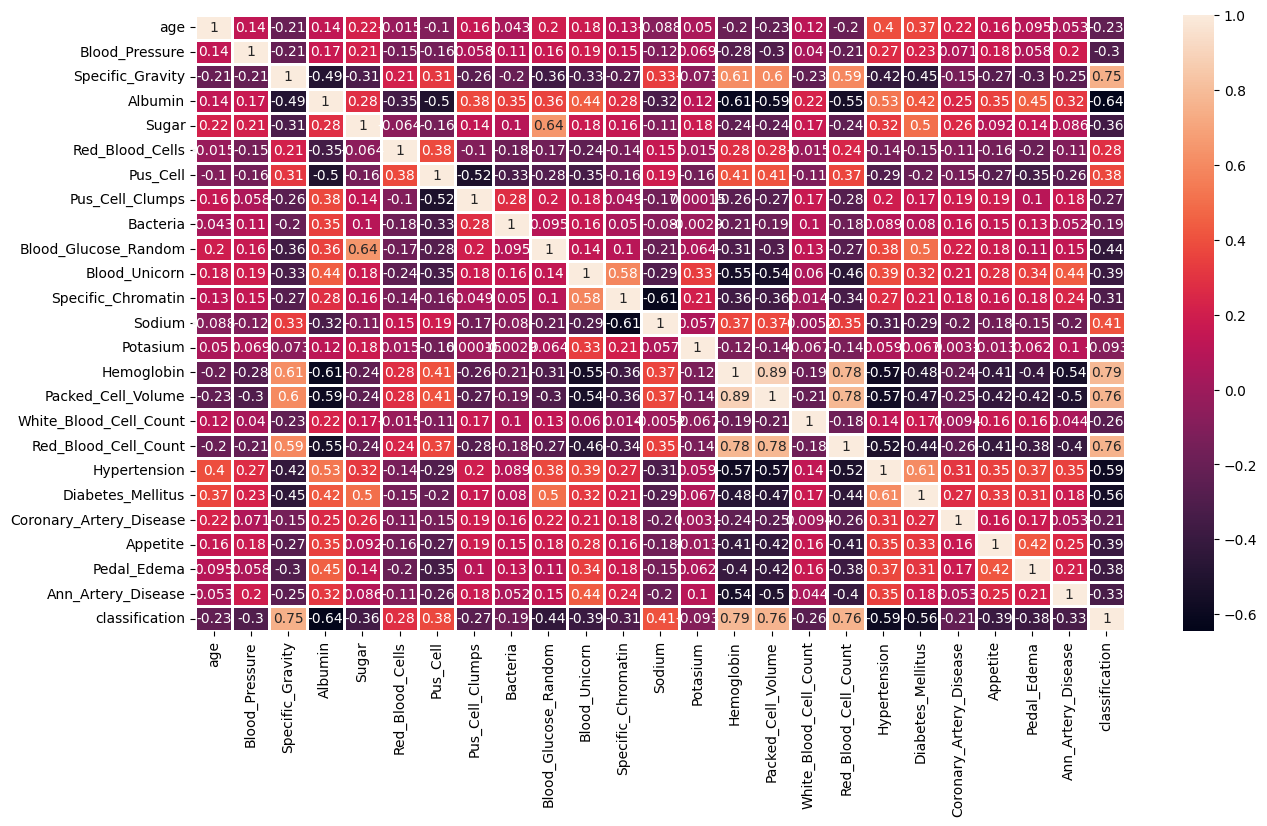

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.75)

In [94]:
from sklearn.model_selection import train_test_split
X = df.drop('classification',axis=1)
y = df['classification']

In [95]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif,k=7)
X_new = selector.fit_transform(X,y)
selected_features = X.columns[selector.get_support()]
print(selected_features)
X=X[selected_features]

Index(['Specific_Gravity', 'Albumin', 'Hemoglobin', 'Packed_Cell_Volume',
       'Red_Blood_Cell_Count', 'Hypertension', 'Diabetes_Mellitus'],
      dtype='object')


In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [98]:
models = {
    'Random_Forest' : RandomForestClassifier(n_estimators=100),
    'Decision_Tree' : DecisionTreeClassifier(max_depth=9),
    'KNeighbors' : KNeighborsClassifier(n_neighbors=8,n_jobs=-1),
    'SVC' : SVC(kernel='linear'),
    'NB' : GaussianNB()
}

In [99]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score

In [100]:
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("------------------------------------------")
  print(f'{name}-trained')
  print("------------------------------------------")
  print('accuracy_score:',accuracy_score(y_test,y_pred))
  print('f1_score:',f1_score(y_test,y_pred))
  print('confusion_matrix:',confusion_matrix(y_test,y_pred))
  print('precision_score:',precision_score(y_test,y_pred))
  print('recall_score:',recall_score(y_test,y_pred))
  print("------------------------------------------")


------------------------------------------
Random_Forest-trained
------------------------------------------
accuracy_score: 1.0
f1_score: 1.0
confusion_matrix: [[65  0]
 [ 0 35]]
precision_score: 1.0
recall_score: 1.0
------------------------------------------
------------------------------------------
Decision_Tree-trained
------------------------------------------
accuracy_score: 1.0
f1_score: 1.0
confusion_matrix: [[65  0]
 [ 0 35]]
precision_score: 1.0
recall_score: 1.0
------------------------------------------
------------------------------------------
KNeighbors-trained
------------------------------------------
accuracy_score: 0.97
f1_score: 0.958904109589041
confusion_matrix: [[62  3]
 [ 0 35]]
precision_score: 0.9210526315789473
recall_score: 1.0
------------------------------------------
------------------------------------------
SVC-trained
------------------------------------------
accuracy_score: 0.99
f1_score: 0.9859154929577465
confusion_matrix: [[64  1]
 [ 0 35]]
preci

In [101]:
best_model = models['Random_Forest']

In [102]:
print("=============================")
print("Best Model is Random_Forest")
print("==============================")

Best Model is Random_Forest


In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Specific_Gravity      400 non-null    float64
 1   Albumin               400 non-null    float64
 2   Hemoglobin            400 non-null    float64
 3   Packed_Cell_Volume    400 non-null    float64
 4   Red_Blood_Cell_Count  400 non-null    float64
 5   Hypertension          400 non-null    int64  
 6   Diabetes_Mellitus     400 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.0 KB


In [104]:
import gradio as gr

In [105]:
def predict_kidney_disease(Specific_Gravity, Albumin, Hemoglobin, Packed_Cell_Volume, Red_Blood_Cell_Count, Hypertension, Diabetes_Mellitus):
    # The model was trained on integer values for Hypertension and Diabetes_Mellitus
    Hypertension = 1 if Hypertension == 'yes' else 0
    Diabetes_Mellitus = 1 if Diabetes_Mellitus == 'yes' else 0

    features = np.array([[Specific_Gravity, Albumin, Hemoglobin, Packed_Cell_Volume, Red_Blood_Cell_Count, Hypertension, Diabetes_Mellitus]])
    prediction = best_model.predict(features)

    return 'You have Chronic kidney disease (CKD) ' if prediction[0] == 0 else "You Don't have Chronic kidney disease (CKD) "

In [106]:
inputs = [
    gr.Number(label="Specific Gravity"),
    gr.Number(label="Albumin"),
    gr.Number(label="Hemoglobin"),
    gr.Number(label="Packed Cell Volume"),
    gr.Number(label="Red Blood Cell Count"),
    gr.Radio(label="Hypertension"),
    gr.Radio(label="Diabetes Mellitus")
]

output = gr.Textbox(label="Kidney Disease Prediction")

gr.Interface(fn=predict_kidney_disease, inputs=inputs, outputs=output, title="Kidney Disease Prediction").launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5a183de72e5d9d455a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
